In [1]:
#learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa

# Semi-conductor manufacturing process

### Data Source

    UCI Machine Learning Repository

##### SECOM Data Set (SEmi-COnductor Manufacturing)

    - License: ---
    - Author: Michael McCann, Adrian Johnston
    - Source Link: https://archive.ics.uci.edu/ml/datasets/SECOM
    - Download: https://archive.ics.uci.edu/ml/machine-learning-databases/secom/
    - Data last updated: ---
    - Origin: --
    - Citation: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

### Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier


import os

In [4]:
### Check version
import sys
import sklearn
print(sys.version)
!python --version
print("numpy: ", np.__version__)
print("sklearn: ", sklearn.__version__)

3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]
Python 3.8.3
numpy:  1.19.5
sklearn:  0.24.0


In [5]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)

# PART - I

### Data

In [40]:
path = '/Users/erv/Desktop/SECOM/'

In [41]:
X = pd.read_csv(path + 'secom.data', header=None)
X.columns = ['f_list']


y = pd.read_csv(path + 'secom_labels.data', header=None)

print(X.shape, y.shape)

(1567, 1) (1567, 1)


## Preprocessing

### Get Timestamp and label

In [42]:
get_timestamp = y.iloc[:,0].apply(lambda s: pd.Timestamp(s.split('"')[1]))

y = y.iloc[:,0].apply(lambda s: int(s.split(" ")[0]))

print(get_timestamp.shape, y.shape)

(1567,) (1567,)


### Convert feature string to columns

In [43]:
X.head(2)

,f_list
0,3030.93 2564 2187.7333 1411.1265 1.3602 100 97...
1,3095.78 2465.14 2230.4222 1463.6606 0.8294 100...


In [44]:
X = X['f_list'].str.split(" ", expand=True)
X = X.astype(float)

print(X.shape)
X.head(2)

(1567, 590)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.0,2916.50,-4043.75,751.00,0.8955,1.7730,3.049,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.085,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.001,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0472,40.855,4.5152,30

### Create original columns

In [45]:
X_orig_cols = X.columns

### Add Timestamp as index to X and y

In [46]:
X.index = get_timestamp
print(X.shape)
X.head(2)

(1567, 590)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.0,2916.50,-4043.75,751.00,0.8955,1.7730,3.049,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.085,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,106

In [47]:
y.index = get_timestamp
y.iloc[0:3]

0
2008-07-19 11:55:00   -1
2008-07-19 12:32:00   -1
2008-07-19 13:17:00    1
Name: 0, dtype: int64

### Fill NaN

In [48]:
X = X.ffill(axis=0)
X = X.bfill(axis=0)

###  Flag if each sensor data point is within or outside 95% confidence intervals

In [49]:
def get_outside_ci_flag(s):
    z_critical = stats.norm.ppf(q=0.975)
    SE = np.std(s)/np.sqrt(len(s))
    moe = z_critical * SE # margin of error
    ci = (np.mean(s) - moe, np.mean(s) + moe)
    
    s_flag = s.apply(lambda x: 0 if ((x>=ci[0]) & (x<=ci[1])) else 1)
    
    return s_flag

In [50]:
cols_95ci = []
for col in X.columns:
    X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
    
    cols_95ci.append('outside_95ci_' + str(col))

print(X.shape)
X.head(2)

(1567, 1180)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,outside_95ci_0,outside_95ci_1,outside_95ci_2,outside_95ci_3,outside_95ci_4,outside_95ci_5,outside_95ci_6,outside_95ci_7,outside_95ci_8,outside_95ci_9,outside_95ci_10,outside_95ci_11,outside_95ci_12,outside_95ci_13,outside_95ci_14,outside_95ci_15,outside_95ci_16,outside_95ci_17,outside_95ci_18,outside_95ci_19,outside_95ci_20,outside_95ci_21,outside_95ci_22,outside_95ci_23,outside_95ci_24,outside_95ci_25,outside_95ci_26,outside_95ci_27,outside_95ci_28,outside_95ci_29,outside_95ci_30,outside_95ci_31,outside_95ci_32,outside_95ci_33,outside_95ci_34,outside_95ci_35,outside_95ci_36,outside_95ci_37,outside_95ci_38,outside_95ci_39,outside_95ci_40,outside_95ci_41,outside_95ci_42,outside_95ci_43,outside_95ci_44,outside_95ci_45,outside_95ci_46,outside_95ci_47,outside_95ci_48,outside_95ci_49,outside_95ci_50,outside_95ci_51,outside_95ci_52,outside_95ci_53,outside_95ci_54,outside_95ci_55,outside_95ci_56,outside_95ci_57,outside_95ci_58,outside_95ci_59,outside_95ci_60,outside_95ci_61,outside_95ci_62,outside_95ci_63,outside_95ci_64,outside_95ci_65,outside_95ci_66,outside_95ci_67,outside_95ci_68,outside_95ci_69,outside_95ci_70,outside_95ci_71,outside_95ci_72,outside_95ci_73,outside_95ci_74,outside_95ci_75,outside_95ci_76,outside_95ci_77,outside_95ci_78,outside_95ci_79,outside_95ci_80,outside_95ci_81,outside_95ci_82,outside_95ci_83,outside_95ci_84,outside_95ci_85,outside_95ci_86,outside_95ci_87,outside_95ci_88,outside_95ci_89,outside_95ci_90,outside_95ci_91,outside_95ci_92,outside_95ci_93,outside_95ci_94,outside_95ci_95,outside_95ci_96,outside_95ci_97,outside_95ci_98,outside_95ci_99,outside_95ci_100,outside_95ci_101,outside_95ci_102,outside_95ci_103,outside_95ci_104,outside_95ci_105,outside_95ci_106,outside_95ci_107,outside_95ci_108,outsid

In [51]:
#### Sum all the '1's outside 95CI
X['sum_outside_95ci'] = X[cols_95ci].sum(axis=1)

In [52]:
X.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,outside_95ci_0,outside_95ci_1,outside_95ci_2,outside_95ci_3,outside_95ci_4,outside_95ci_5,outside_95ci_6,outside_95ci_7,outside_95ci_8,outside_95ci_9,outside_95ci_10,outside_95ci_11,outside_95ci_12,outside_95ci_13,outside_95ci_14,outside_95ci_15,outside_95ci_16,outside_95ci_17,outside_95ci_18,outside_95ci_19,outside_95ci_20,outside_95ci_21,outside_95ci_22,outside_95ci_23,outside_95ci_24,outside_95ci_25,outside_95ci_26,outside_95ci_27,outside_95ci_28,outside_95ci_29,outside_95ci_30,outside_95ci_31,outside_95ci_32,outside_95ci_33,outside_95ci_34,outside_95ci_35,outside_95ci_36,outside_95ci_37,outside_95ci_38,outside_95ci_39,outside_95ci_40,outside_95ci_41,outside_95ci_42,outside_95ci_43,outside_95ci_44,outside_95ci_45,outside_95ci_46,outside_95ci_47,outside_95ci_48,outside_95ci_49,outside_95ci_50,outside_95ci_51,outside_95ci_52,outside_95ci_53,outside_95ci_54,outside_95ci_55,outside_95ci_56,outside_95ci_57,outside_95ci_58,outside_95ci_59,outside_95ci_60,outside_95ci_61,outside_95ci_62,outside_95ci_63,outside_95ci_64,outside_95ci_65,outside_95ci_66,outside_95ci_67,outside_95ci_68,outside_95ci_69,outside_95ci_70,outside_95ci_71,outside_95ci_72,outside_95ci_73,outside_95ci_74,outside_95ci_75,outside_95ci_76,outside_95ci_77,outside_95ci_78,outside_95ci_79,outside_95ci_80,outside_95ci_81,outside_95ci_82,outside_95ci_83,outside_95ci_84,outside_95ci_85,outside_95ci_86,outside_95ci_87,outside_95ci_88,outside_95ci_89,outside_95ci_90,outside_95ci_91,outside_95ci_92,outside_95ci_93,outside_95ci_94,outside_95ci_95,outside_95ci_96,outside_95ci_97,outside_95ci_98,outside_95ci_99,outside_95ci_100,outside_95ci_101,outside_95ci_102,outside_95ci_103,outside_95ci_104,outside_95ci_105,outside_95ci_106,outside_95ci_107,outside_95ci_108,outsid

### Cumsum

In [54]:
for col in X.columns:
    if(col in X_orig_cols):
        X['cumsum_' + str(col)] = X[col].cumsum()
        
print(X.shape)

(1567, 1771)


### Rolling

In [55]:
for col in X.columns:
    if(col in X_orig_cols):
        X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
        X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
        X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
    
print(X.shape)

(1567, 3541)


### Time

In [57]:
X.index.max()

Timestamp('2008-12-10 18:47:00')

In [58]:
X.index.min()

Timestamp('2008-01-08 02:02:00')

In [59]:
X['month'] = X.index.month
X['weekday'] = X.index.weekday
X['hour'] = X.index.hour

### Time of Day

In [60]:
time_of_day = ['late_night', 'early_morning', 'morning', 'noon', 'evening', 'night']
X['work_shift'] = pd.cut(X['hour'], bins=[0,4,8,12,16,20,24], labels=time_of_day, include_lowest=True)

print(X.shape)
X.head(2)

(1567, 3545)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,outside_95ci_0,outside_95ci_1,outside_95ci_2,outside_95ci_3,outside_95ci_4,outside_95ci_5,outside_95ci_6,outside_95ci_7,outside_95ci_8,outside_95ci_9,outside_95ci_10,outside_95ci_11,outside_95ci_12,outside_95ci_13,outside_95ci_14,outside_95ci_15,outside_95ci_16,outside_95ci_17,outside_95ci_18,outside_95ci_19,outside_95ci_20,outside_95ci_21,outside_95ci_22,outside_95ci_23,outside_95ci_24,outside_95ci_25,outside_95ci_26,outside_95ci_27,outside_95ci_28,outside_95ci_29,outside_95ci_30,outside_95ci_31,outside_95ci_32,outside_95ci_33,outside_95ci_34,outside_95ci_35,outside_95ci_36,outside_95ci_37,outside_95ci_38,outside_95ci_39,outside_95ci_40,outside_95ci_41,outside_95ci_42,outside_95ci_43,outside_95ci_44,outside_95ci_45,outside_95ci_46,outside_95ci_47,outside_95ci_48,outside_95ci_49,outside_95ci_50,outside_95ci_51,outside_95ci_52,outside_95ci_53,outside_95ci_54,outside_95ci_55,outside_95ci_56,outside_95ci_57,outside_95ci_58,outside_95ci_59,outside_95ci_60,outside_95ci_61,outside_95ci_62,outside_95ci_63,outside_95ci_64,outside_95ci_65,outside_95ci_66,outside_95ci_67,outside_95ci_68,outside_95ci_69,outside_95ci_70,outside_95ci_71,outside_95ci_72,outside_95ci_73,outside_95ci_74,outside_95ci_75,outside_95ci_76,outside_95ci_77,outside_95ci_78,outside_95ci_79,outside_95ci_80,outside_95ci_81,outside_95ci_82,outside_95ci_83,outside_95ci_84,outside_95ci_85,outside_95ci_86,outside_95ci_87,outside_95ci_88,outside_95ci_89,outside_95ci_90,outside_95ci_91,outside_95ci_92,outside_95ci_93,outside_95ci_94,outside_95ci_95,outside_95ci_96,outside_95ci_97,outside_95ci_98,outside_95ci_99,outside_95ci_100,outside_95ci_101,outside_95ci_102,outside_95ci_103,outside_95ci_104,outside_95ci_105,outside_95ci_106,outside_95ci_107,outside_95ci_108,outsid

### Timeseries plots

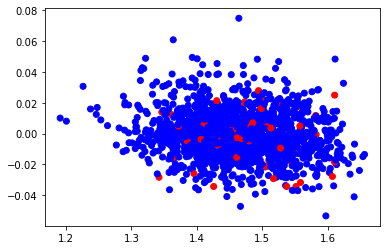

In [63]:
cmap = {-1:'b', 1:'r'}

c = y.map(cmap)
plt.scatter(X.iloc[:,8], X.iloc[:,9], c=c)

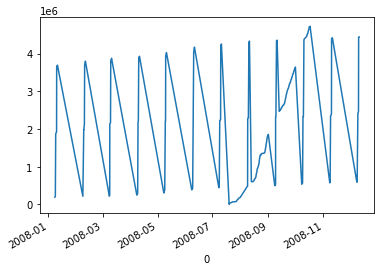

In [65]:
z = X.iloc[:,0].cumsum()
z.plot()

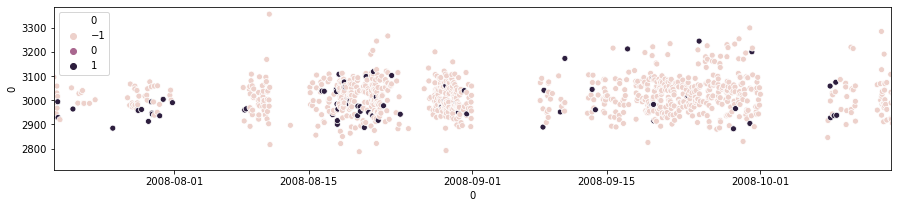

In [69]:
fig = plt.figure(figsize=(15,3))
sns.scatterplot(data=X, x=X.index, y=0, hue=y)
plt.xlim(X.index[0], X.index[1500])
plt.show()

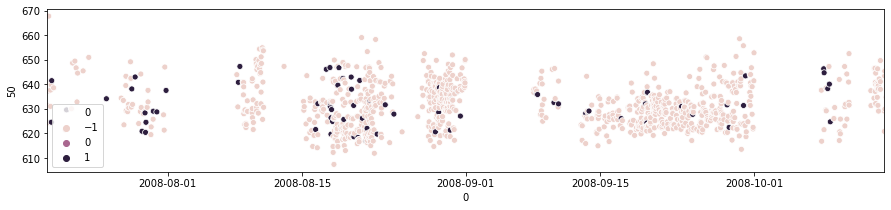

In [70]:
fig = plt.figure(figsize=(15,3))
sns.scatterplot(data=X, x=X.index, y=50, hue=y)
plt.xlim(X.index[0], X.index[1500])
plt.show()

### Seasonality

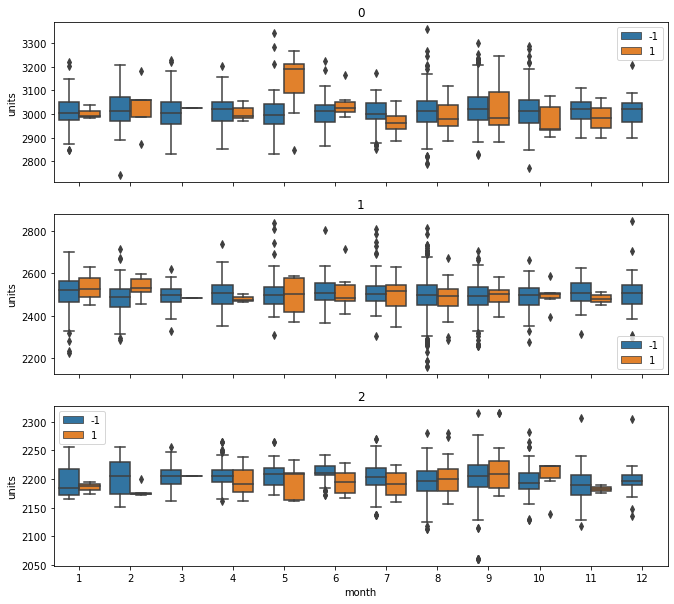

In [74]:
fig, axes = plt.subplots(3,1, figsize = (11,10), sharex = True)

for name, ax in zip([0,1,2], axes):
    sns.boxplot(data=X, x='month', y=name, ax=ax, hue=y)
    
    ax.set_ylabel('units')
    ax.set_title(name)
    
    if ax!= axes[-1]:
        ax.set_xlabel('')

### Check for missing values

In [75]:
X.isna().sum().sort_values(ascending=False).head(10)

rol_std_7D_0       6
rol_mean_7D_222    6
rol_mean_7D_234    6
rol_std_7D_234     6
rol_mean_7D_235    6
rol_std_7D_235     6
rol_mean_7D_236    6
rol_std_7D_236     6
rol_mean_7D_237    6
rol_std_7D_237     6
dtype: int64

### Convert ordinals

In [76]:
dummify_cols =['month', 'weekday', 'hour', 'work_shift']

X[['month', 'weekday', 'hour']] = X[['month', 'weekday', 'hour']].astype(str)
X = pd.concat([X.drop(dummify_cols, axis=1) , pd.get_dummies(X[dummify_cols])], axis=1)

print(X.shape)
X.head(2)

(1567, 3590)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,outside_95ci_0,outside_95ci_1,outside_95ci_2,outside_95ci_3,outside_95ci_4,outside_95ci_5,outside_95ci_6,outside_95ci_7,outside_95ci_8,outside_95ci_9,outside_95ci_10,outside_95ci_11,outside_95ci_12,outside_95ci_13,outside_95ci_14,outside_95ci_15,outside_95ci_16,outside_95ci_17,outside_95ci_18,outside_95ci_19,outside_95ci_20,outside_95ci_21,outside_95ci_22,outside_95ci_23,outside_95ci_24,outside_95ci_25,outside_95ci_26,outside_95ci_27,outside_95ci_28,outside_95ci_29,outside_95ci_30,outside_95ci_31,outside_95ci_32,outside_95ci_33,outside_95ci_34,outside_95ci_35,outside_95ci_36,outside_95ci_37,outside_95ci_38,outside_95ci_39,outside_95ci_40,outside_95ci_41,outside_95ci_42,outside_95ci_43,outside_95ci_44,outside_95ci_45,outside_95ci_46,outside_95ci_47,outside_95ci_48,outside_95ci_49,outside_95ci_50,outside_95ci_51,outside_95ci_52,outside_95ci_53,outside_95ci_54,outside_95ci_55,outside_95ci_56,outside_95ci_57,outside_95ci_58,outside_95ci_59,outside_95ci_60,outside_95ci_61,outside_95ci_62,outside_95ci_63,outside_95ci_64,outside_95ci_65,outside_95ci_66,outside_95ci_67,outside_95ci_68,outside_95ci_69,outside_95ci_70,outside_95ci_71,outside_95ci_72,outside_95ci_73,outside_95ci_74,outside_95ci_75,outside_95ci_76,outside_95ci_77,outside_95ci_78,outside_95ci_79,outside_95ci_80,outside_95ci_81,outside_95ci_82,outside_95ci_83,outside_95ci_84,outside_95ci_85,outside_95ci_86,outside_95ci_87,outside_95ci_88,outside_95ci_89,outside_95ci_90,outside_95ci_91,outside_95ci_92,outside_95ci_93,outside_95ci_94,outside_95ci_95,outside_95ci_96,outside_95ci_97,outside_95ci_98,outside_95ci_99,outside_95ci_100,outside_95ci_101,outside_95ci_102,outside_95ci_103,outside_95ci_104,outside_95ci_105,outside_95ci_106,outside_95ci_107,outside_95ci_108,outsid

### Drop features with zero variability

In [77]:
print(X.shape)
X = X[X.columns[(X.var(axis=0)>0).values]]

print(X.shape)

(1567, 3590)
(1567, 2882)


### Collinearity

In [78]:
x_corr = X.corr()**2

x_upper = x_corr.where(np.triu(np.ones(x_corr.shape), k=1).astype(np.bool))

# r2 > 0.7
drop_col = [col for col in x_upper.columns if any(x_upper[col] >0.70)]

In [79]:
print(X.shape)
X = X.drop(X[drop_col], axis=1)

print(X.shape)

(1567, 2882)
(1567, 1143)


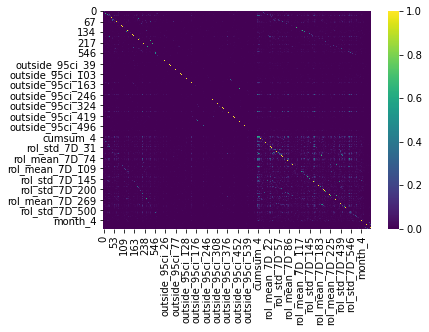

In [80]:
# Visualize
x_corr = X.corr()**2
sns.heatmap(x_corr, cmap='viridis')

### Fill NaN

In [81]:
X = X.fillna(0)

# PART - II



In [83]:
y.value_counts()

-1    1463
 1     104
Name: 0, dtype: int64

### Resample imbalanced classes

In [86]:
from sklearn.utils import resample

In [87]:
Xy = X.copy()
Xy['y'] = y.copy()
print(Xy.shape)

(1567, 1144)


In [88]:
X_majority = Xy[Xy['y'] == -1]
X_minority = Xy[Xy['y'] == 1]

print(X_majority.shape, X_minority.shape)

(1463, 1144) (104, 1144)


In [91]:
# Upsample
X_minority_upsampled = resample(X_minority, replace=True, n_samples=X_majority.shape[0], random_state=0)

print(X_minority_upsampled.shape)

(1463, 1144)


In [92]:
# Combine
X_upsampled = pd.concat([X_majority, X_minority_upsampled])

print(X_minority_upsampled.shape)
print(X_upsampled.shape)

(1463, 1144)
(2926, 1144)


In [94]:
X_upsampled.columns

Index([                         0,                          1,
                                2,                          3,
                                4,                          6,
                                7,                          8,
                                9,                         10,
       ...
                         'hour_7',                   'hour_8',
                         'hour_9',    'work_shift_late_night',
       'work_shift_early_morning',       'work_shift_morning',
                'work_shift_noon',       'work_shift_evening',
               'work_shift_night',                        'y'],
      dtype='object', length=1144)

In [96]:
Xup = X_upsampled[X_upsampled.columns[~X_upsampled.columns.isin(['y'])]]
Xup.shape

(2926, 1143)

In [97]:
yup = X_upsampled['y']
yup.shape

(2926,)

In [98]:
yup.value_counts()

 1    1463
-1    1463
Name: y, dtype: int64

### Train test split

In [99]:
x_train, x_test, y_train, y_test = train_test_split(Xup, yup,
                                                   shuffle=True,
                                                   stratify=yup,
                                                   test_size=0.33)

print(x_train.shape, x_test.shape)

(1960, 1143) (966, 1143)


### Separate 1, 0  encoded

In [102]:
def sep_ord_reg(df):
    ord_cols=[]
    
    for col in df.columns:
        if((df[col].unique().sum()==1) & (df[col].nunique()==2)):
            ord_cols.append(col)
    
    reg_cols = df.columns[~df.columns.isin(ord_cols)]
    
    return df[ord_cols], df[reg_cols]

In [104]:
x_train_ord, x_train_reg  = sep_ord_reg(x_train)

x_test_ord = x_test[x_train_ord.columns]
x_test_reg = x_test[x_train_reg.columns]

print(x_train_reg.shape, x_test_reg.shape)

(1960, 677) (966, 677)


### Standardize

In [105]:
scl = preprocessing.StandardScaler()
scl.fit(x_train_reg)

StandardScaler()

In [106]:
x_train_reg = scl.transform(x_train_reg)
x_test_reg = scl.transform(x_test_reg)

In [107]:
### Combine

x_train = np.concatenate([x_train_reg, np.array(x_train_ord)], axis=1)
x_test = np.concatenate([x_test_reg, np.array(x_test_ord)], axis=1)

print(x_train.shape, x_test.shape)

(1960, 1143) (966, 1143)


### Baseline model

In [108]:
clf = linear_model.LogisticRegression(max_iter=5e3)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

acu = metrics.accuracy_score(y_test, y_pred)
print('accuracy score: ', acu)

cm = metrics.confusion_matrix(y_test, y_pred)
cm

accuracy score:  0.953416149068323


array([[438,  45],
       [  0, 483]])

### Model

In [110]:
def fit_predict(clf):
    clf.fit(x_train, y_train)
    print(clf)
    
    y_pred = clf.predict(x_test)
    
    acu = metrics.accuracy_score(y_test, y_pred)
    print('accuracy score: ', acu)
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    
    plt.show()
    print(cm)
    
    return acu, cm

In [115]:
model_list = [
    (linear_model.LogisticRegression(max_iter=5e3, penalty='elasticnet', solver='saga', l1_ratio=0.45), 'Logistic Regression'),
    (linear_model.LogisticRegressionCV(cv=3, max_iter=5e3,random_state=0), 'Logistic Regression CV'),
    (linear_model.LogisticRegressionCV(cv=3, max_iter=5e3,penalty='elasticnet', solver='saga', l1_ratios=[0.25, 0.45, 0.75], random_state=0), 'Logistic Regression CV'),
    (linear_model.RidgeClassifier(random_state=0), 'Ridge Classifier'),
    (linear_model.RidgeClassifierCV(alphas=[1e-3, 1e-2, .1, .4, .75, 1, 10]), 'Ridge Classifier CV'),
    (linear_model.SGDClassifier(random_state=0), 'SGD Classifier'),
    (linear_model.Perceptron(random_state=0), 'Perceptron'),
    (svm.LinearSVC(random_state=0), 'Linear SVC'),
    (LinearDiscriminantAnalysis(), 'LDA'),
    (QuadraticDiscriminantAnalysis(reg_param=0.5), 'QDA'),
    (linear_model.PassiveAggressiveClassifier(C=0.5, random_state=0), 'Passive Aggressive Classifier'),
    (RandomForestClassifier(random_state=0), 'Random Forest Classifier')
]

results = []
for clf, name in model_list:
    print('-'*25)
    print(name)
    print('-'*25)
    
    results.append((fit_predict(clf), name))
    
    print('-'*25, '\n\n')

-------------------------
Logistic Regression
-------------------------
LogisticRegression(l1_ratio=0.45, max_iter=5000.0, penalty='elasticnet',
                   solver='saga')
accuracy score:  0.9523809523809523
[[437  46]
 [  0 483]]
------------------------- 


-------------------------
Logistic Regression CV
-------------------------
LogisticRegressionCV(cv=3, max_iter=5000.0, random_state=0)
accuracy score:  0.9513457556935818
[[436  47]
 [  0 483]]
------------------------- 


-------------------------
Logistic Regression CV
-------------------------
LogisticRegressionCV(cv=3, l1_ratios=[0.25, 0.45, 0.75], max_iter=5000.0,
                     penalty='elasticnet', random_state=0, solver='saga')
accuracy score:  0.9544513457556936
[[439  44]
 [  0 483]]
------------------------- 


-------------------------
Ridge Classifier
-------------------------
RidgeClassifier(random_state=0)
accuracy score:  0.8964803312629399
[[383 100]
 [  0 483]]
------------------------- 


----------

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=0)
accuracy score:  0.9554865424430642
[[440  43]
 [  0 483]]
------------------------- 


-------------------------
LDA
-------------------------
LinearDiscriminantAnalysis()
accuracy score:  0.7846790890269151
[[275 208]
 [  0 483]]
------------------------- 


-------------------------
QDA
-------------------------


/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(reg_param=0.5)
accuracy score:  0.9513457556935818
[[436  47]
 [  0 483]]
------------------------- 


-------------------------
Passive Aggressive Classifier
-------------------------
PassiveAggressiveClassifier(C=0.5, random_state=0)
accuracy score:  0.9585921325051759
[[443  40]
 [  0 483]]
------------------------- 


-------------------------
Random Forest Classifier
-------------------------
RandomForestClassifier(random_state=0)
accuracy score:  1.0
[[483   0]
 [  0 483]]
------------------------- 




# Congratulations on completing the machine learning project!
## Hope you enjoyed the data analysis. Thank you !!!
### Please like, share and subscribe to learndataa

https://www.youtube.com/c/learndataa

In [2]:
#learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa